**Effiicient Net to classify Acute Lymphoblastic Cells from Normal ones**

In [ ]:
!pip install -q efficientnet

     |████████████████████████████████| 50 kB 2.7 MB/s 


Architecture:

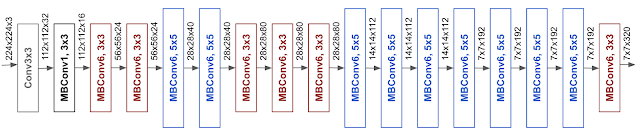

Importing Libraries

In [ ]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import efficientnet.tfkeras as efn
import tensorflow.keras.layers as L
import tensorflow.keras.backend as K
from matplotlib import pyplot as plt
import math, os, re, warnings, random, cv2
from sklearn.utils import class_weight
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras import optimizers, applications, Sequential, losses, metrics
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,LearningRateScheduler

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.models import *
import cv2
import skimage.io
import io
import os
from google.colab.patches import cv2_imshow

In [ ]:
all = []
a = 0
hem = []
h = 0

In [ ]:
for i in os.scandir('/content/drive/MyDrive/Colab Notebooks/C-NMC_Leukemia/training_data/fold_0'):
    if i.path[75:78] == 'all':
        for j in os.scandir(i):
            if a<1100:
                img = cv2.imread(j.path)
                img = cv2.resize(img, (128,128))
                all.append(img)   
                a +=1 
    if i.path[75:78] == 'hem':
        for j in os.scandir(i):
            if h<1100:
                img = cv2.imread(j.path)
                img = cv2.resize(img, (128,128))
                hem.append(img) 
                h +=1
    if a == 1100 and h == 1100:
        break

In [ ]:
all = np.array(all)
hem = np.array(hem)
print(all.shape, hem.shape)

(1100, 128, 128, 3) (1100, 128, 128, 3)


In [ ]:
X = np.concatenate((all,hem), axis = 0)

In [ ]:
Y = np.zeros((2200, 1))
for i in range(1100):
    Y[i] = 1

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 3, test_size = 0.3)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1540, 128, 128, 3) (660, 128, 128, 3) (1540, 1) (660, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, Adamax
class_count = 1
img_shape = (128,128,3)

In [ ]:
model_name = 'EfficientNetB3'
base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top = False, weights = "imagenet", input_shape = img_shape, pooling = 'max')
x = base_model.output
x = keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016), 
          activity_regularizer= regularizers.l1(0.006), 
          bias_regularizer = regularizers.l1(0.006), 
          activation='relu')(x)
x = Dropout(rate = 0.45, seed=123)(x)
output = Dense(class_count, activation='relu')(x)
model = Model(inputs=base_model.input, outputs=output)
model.compile(Adamax(learning_rate = 0.0005), loss='binary_crossentropy', metrics=['accuracy'])

43950080/43941136 [==============================] - 2s 0us/step


In [ ]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 10, batch_size = 32, shuffle = True)

Epoch 1/10
49/49 [==============================] - 20s 404ms/step - loss: 7.5151 - accuracy: 0.8662 - val_loss: 8.6131 - val_accuracy: 0.7909
Epoch 2/10
49/49 [==============================] - 20s 403ms/step - loss: 7.5450 - accuracy: 0.8649 - val_loss: 8.7065 - val_accuracy: 0.7788
Epoch 3/10
49/49 [==============================] - 20s 418ms/step - loss: 7.5150 - accuracy: 0.8662 - val_loss: 8.3025 - val_accuracy: 0.7970
Epoch 4/10
49/49 [==============================] - 20s 404ms/step - loss: 7.4535 - accuracy: 0.8766 - val_loss: 8.1778 - val_accuracy: 0.8121
Epoch 5/10
49/49 [==============================] - 20s 402ms/step - loss: 7.3496 - accuracy: 0.8779 - val_loss: 8.3809 - val_accuracy: 0.8015
Epoch 6/10
49/49 [==============================] - 20s 402ms/step - loss: 7.5878 - accuracy: 0.8500 - val_loss: 8.0007 - val_accuracy: 0.8152
Epoch 7/10
49/49 [==============================] - 20s 403ms/step - loss: 7.2627 - accuracy: 0.8773 - val_loss: 7.8747 - val_accuracy: 0.8197

In [ ]:
train_perf = model.evaluate(X_train, Y_train)
test_perf = model.evaluate(X_test, Y_test)

21/21 [==============================] - 2s 92ms/step - loss: 8.9349 - accuracy: 0.7561
